In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

dataset = pd.read_csv('sgemm_product.csv')


dataset.isnull().sum()

columns = ['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']
df = dataset[columns].to_numpy()
a= df.mean(axis = 1)
#data.head()
datax = dataset.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis = 1)
#datax.head()
datax['runtime'] = a
datax.head()

datax200 = datax.sample(n=50000,replace=True)
datax200
X_SVM = datax200.iloc[:,0:13].values    
Y_SVM = datax200.iloc[:,14:15].values






In [2]:
datax200

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,runtime
124591,64,128,32,8,8,16,8,2,2,4,1,1,1,1,1542.4375
89409,64,64,16,8,8,32,32,2,2,1,0,0,0,1,226.6500
35166,32,64,16,8,16,32,32,8,1,2,1,1,1,0,31.8625
118123,64,128,16,16,8,8,8,8,2,1,1,0,1,1,146.3475
95178,64,64,16,16,16,16,32,8,2,1,1,0,1,0,29.8125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143032,128,16,16,8,16,8,16,2,8,1,1,0,0,0,127.3575
32084,32,64,16,8,8,8,8,2,4,8,0,1,0,0,27.0075
240729,128,128,32,32,16,32,16,2,2,2,1,0,0,1,27.4350
50314,32,128,16,8,16,16,16,8,2,1,1,0,1,0,36.4700


In [20]:
# Assigning 0s and 1s based on Median Average Runtime
Y_SVM = np.where(Y_SVM<= 69.79,0,1)
#Y_SVM = pd.DataFrame(Y_SVM)

from sklearn.preprocessing import StandardScaler
dataset_sc = StandardScaler()
X_SVM = dataset_sc.fit_transform(X_SVM)
#Y_SVM = dataset_sc_LogReg.fit_transform(Y_SVM)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SVM, Y_SVM, test_size = 0.25, random_state = 0)



In [4]:
Y_SVM.ravel()

array([1, 1, 0, ..., 0, 0, 0])

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
classifier.fit(X_test, y_test)



c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [6]:
from sklearn import metrics
print('Accuracy Score:')
y_pred = classifier.predict(X_test)
y_pred
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.83512


In [9]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))


c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:
0.93752


In [10]:
degree=[2,3,4,5]
acc_train=[]
acc_test=[]
for i in degree:
    svc=SVC(kernel='poly',degree=i,random_state=0)
    svc.fit(X_test,y_test)
    y_pred_test=svc.predict(X_test)
    svc.fit(X_train,y_train)
    y_pred_train=svc.predict(X_train)
    acc_test.append(metrics.accuracy_score(y_test,y_pred_test))
    acc_train.append(metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score:',acc_train,acc_test)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversio

Accuracy Score: [0.7377066666666666, 0.8971466666666666, 0.90304, 0.9188266666666667] [0.73992, 0.88808, 0.87904, 0.91096]


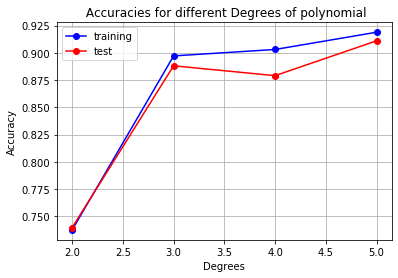

In [11]:
plt.plot(degree,acc_train,marker='o',markersize=6,color='blue',label='training')
plt.plot(degree,acc_test,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Degrees of polynomial")
plt.xlabel("Degrees")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
classifier_1 = SVC(kernel = 'linear', random_state = 0)
classifier_1.fit(X_train, y_train)
classifier_2 = SVC(kernel = 'rbf', random_state = 0)
classifier_2.fit(X_train, y_train)
classifier_3 = SVC(kernel = 'poly', degree=5)
classifier_3.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
y_pred_1 = classifier_1.predict(X_test)
y_pred_2 = classifier_2.predict(X_test)
y_pred_3 = classifier_3.predict(X_test)

In [24]:
acc_linear = accuracy_score(y_test , y_pred_1)
acc_rbf = accuracy_score(y_test , y_pred_2)
acc_poly = accuracy_score(y_test , y_pred_3)

In [25]:
from sklearn.model_selection import cross_val_score
svc=classifier_1 
scores_linear = cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy') #cv is cross validation
print(scores_linear)
print('Scores mean',scores_linear.mean())

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversio

[0.8488 0.832  0.82   0.8392 0.8424 0.8376 0.8248 0.8424 0.828  0.8592]
Scores mean 0.83744


In [26]:
svc=classifier_2
scores_rbf = cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy') #cv is cross validation
print(scores_rbf)
print('Scores mean',scores_rbf.mean())

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversio

[0.932  0.9216 0.9224 0.9384 0.932  0.924  0.9128 0.9256 0.9144 0.9288]
Scores mean 0.9252


In [27]:
svc=classifier_3
scores_poly = cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy') #cv is cross validation
print(scores_poly)
print('Scores mean',scores_poly.mean())

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversio

[0.8896 0.8672 0.8672 0.8832 0.896  0.8752 0.868  0.8664 0.8656 0.8808]
Scores mean 0.87592


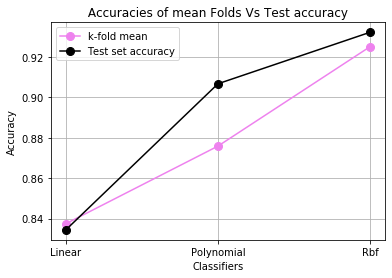

In [28]:
mean_acc = [scores_linear.mean(), scores_poly.mean(),scores_rbf.mean()]
test_acc = [acc_linear,acc_poly,acc_rbf]
range_svm = ['Linear','Polynomial','Rbf']
plt.plot(range_svm , mean_acc , marker ='o', markersize = 8 , color ='violet',label='k-fold mean')
plt.plot(range_svm , test_acc ,marker ='o', markersize = 8 , color ='black',label='Test set accuracy')
plt.title(" Accuracies of mean Folds Vs Test accuracy ")
plt.xlabel("Classifiers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()